# 2.4 . NYC CITY BIKE & NOAA WEATHER ( SEABORN )

In [1]:
# Import libraries

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt
import seaborn as sns

In [2]:
# Import data (nyc city bikes and noaa weather data)

df = pd.read_csv(r'C:\Users\carol\Documents\Data Specialization\nyc_noaa_analysis\nyc_data.csv',index_col = 0)

C:\Users\carol\AppData\Local\Temp\ipykernel_33156\1804053677.py:3: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\carol\Documents\Data Specialization\nyc_noaa_analysis\nyc_data.csv',index_col = 0)


In [3]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp', '_merge'],
      dtype='object')

In [4]:
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
date                   object
avgTemp               float64
_merge                 object
dtype: object

In [5]:
# Transform date as datetime64

df['date'] = pd.to_datetime(df['date'], errors = 'coerce')

In [6]:
#Drop rown with invalid data

df = df.dropna(subset = ['date','avgTemp'])

In [7]:
# Checking changes

df.dtypes

ride_id                       object
rideable_type                 object
started_at                    object
ended_at                      object
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
date                  datetime64[ns]
avgTemp                      float64
_merge                        object
dtype: object

In [8]:
df.shape

(29838166, 16)

In [9]:
import matplotlib as mpl

In [10]:
# Adjust Matplotlib settings to handle large data
mpl.rcParams['agg.path.chunksize'] = 10000  # Adjust chunk size to process large plots
mpl.rcParams['path.simplify'] = True        # Simplify paths for performance
mpl.rcParams['path.simplify_threshold'] = 0.5  # Adjust threshold for path simplification

In [11]:
#Downsample the data for efficiency

N = 3  # Take every 10th row
df_ds = df.iloc[::N, :]

In [12]:
df_ds.shape

(9946056, 16)

# BAR CHART WITH THE MOST FREQUENTLY USED STARTING STATIONS

In [13]:
#IDENTIFY THE MOST USED STATIONS
# trick used when you want to count the occurrences of items grouped by a specific column. each row in the DataFrame is assigned a value of 1

df_ds['value'] = 1

C:\Users\carol\AppData\Local\Temp\ipykernel_33156\2465197985.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ds['value'] = 1


In [14]:
df_t = df_ds.groupby('start_station_name')['value'].count().reset_index()

In [15]:
#Checking data from df_t

df_t

,start_station_name,value
0,1 Ave & E 110 St,7181
1,1 Ave & E 16 St,22427
2,1 Ave & E 18 St,23581
3,1 Ave & E 30 St,15206
4,1 Ave & E 39 St,17478
...,...,...
1756,Wyckoff Ave & Gates Ave,5503
1757,Wyckoff St & 3 Ave,76
1758,Wyckoff St & Nevins St,3872
1759,Wythe Ave & Metropolitan Ave,22099


In [16]:
#Identify TOP20 most used starting stations

TOP20 = df_t.nlargest(20,'value')

In [17]:
#Checking data

TOP20

,start_station_name,value
1587,W 21 St & 6 Ave,43011
1718,West St & Chambers St,40747
495,Broadway & W 58 St,38210
286,6 Ave & W 33 St,35391
8,1 Ave & E 68 St,34800
485,Broadway & W 25 St,32996
461,Broadway & E 14 St,32749
1511,University Pl & E 14 St,32358
463,Broadway & E 21 St,31703
1603,W 31 St & 7 Ave,31490


In [18]:
# Define the cubehelix palette and assign it to a variable
palette = sns.cubehelix_palette(reverse=True)


C:\Users\carol\AppData\Local\Temp\ipykernel_33156\2214857912.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=TOP20, x='value', y='start_station_name', palette=palette)
C:\Users\carol\AppData\Local\Temp\ipykernel_33156\2214857912.py:2: UserWarning: 
The palette list has fewer values (6) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=TOP20, x='value', y='start_station_name', palette=palette)


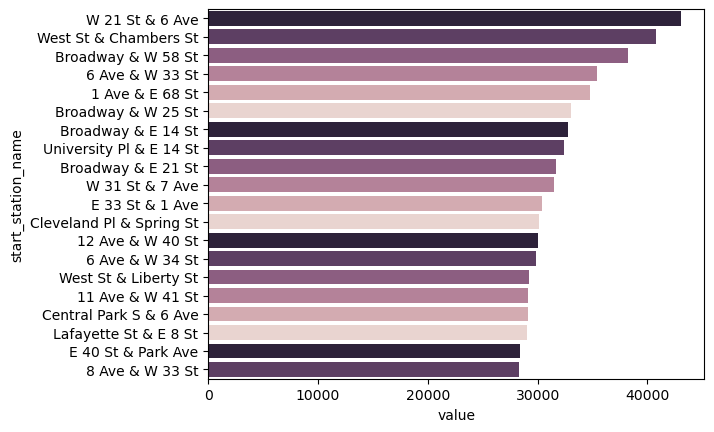

In [19]:
# Use the palette in the barplot
sns.barplot(data=TOP20, x='value', y='start_station_name', palette=palette)
plt.show()

In [20]:
#Create a bar chart

#Set sns style and palette
sns.set_theme(style="darkgrid", palette="viridis")


using sns.set_theme(style="darkgrid", palette="viridis") adding more contrasting colors with edgecolor in white to soften the data view. 

C:\Users\carol\AppData\Local\Temp\ipykernel_33156\20715476.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=TOP20, x='value', y='start_station_name', palette="viridis", edgecolor="white")


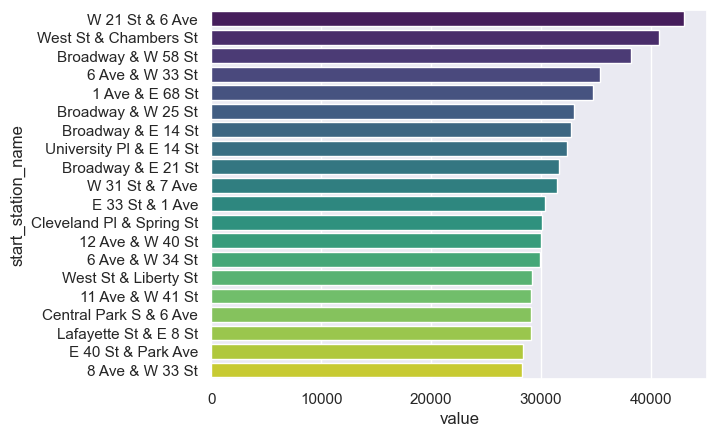

In [21]:
sns.barplot(data=TOP20, x='value', y='start_station_name', palette="viridis", edgecolor="white")
plt.show()

In the previous barchart I used **cubehelix_palette** in reverse as the chart palette. However, there was a limited numer of colors in the palette and was not enough to go through the entire TOP20 stations. 

With **Viridis** as a palette I have the gradient to present the entire list. By adding a darkgrid as style creates contrast with the lightest colors easing data readability. 

# DUAL AXIS LINE PLOT USING SEABORN

In [22]:
#Change format to column date

df_ds['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')

C:\Users\carol\AppData\Local\Temp\ipykernel_33156\3726100844.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ds['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')


In [23]:
# Create a df_group with the date and the Count ride_id

df_group = pd.DataFrame(df_ds.groupby(['date'])['ride_id'].count()).reset_index()

In [24]:
#Check data 

df_group

,date,ride_id
0,2022-01-01,6864
1,2022-01-02,14167
2,2022-01-03,11102
3,2022-01-04,12309
4,2022-01-05,11441
...,...,...
360,2022-12-27,10996
361,2022-12-28,14579
362,2022-12-29,17076
363,2022-12-30,20839


In [25]:
print("merge_flag in df_ds:", 'merge_flag' in df_ds.columns)
print("merge_flag in df_group:", 'merge_flag' in df_group.columns)

merge_flag in df_ds: False
merge_flag in df_group: False


In [26]:
#Rename the ride_id column to for a more explanatory definition

df_group.rename(columns = {'ride_id':'bike_rides_daily'}, inplace= True)

df_ds = df_ds.drop(columns=['merge_flag'], errors='ignore')


#Merge df_group to df_ds

df_ds = df_ds.merge(df_group, on = 'date', how= 'outer', indicator = 'merge_flag')

#Count the merge data and drop and NaN Values
print (df_ds['merge_flag'].value_counts(dropna=False))



merge_flag
both          9946056
left_only           0
right_only          0
Name: count, dtype: int64


In [27]:
#Create a new df df_temp with the date as index

df_temp = df_ds.set_index('date')

In [28]:
df_temp.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'avgTemp', '_merge', 'value', 'bike_rides_daily',
       'merge_flag'],
      dtype='object')

In [29]:
df_temp.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp,_merge,value,bike_rides_daily,merge_flag
date,,,,,,,,,,,,,,,,,,
2022-01-01,4A091640AEC83471,classic_bike,2022-01-01 16:01:22.082,2022-01-01 16:05:11.986,S 4 St & Wythe Ave,5204.05,Kent Ave & S 11 St,5062.01,40.712859,-73.965903,40.707645,-73.968415,member,11.6,both,1,6864,both
2022-01-01,FE4CE7F1CFFD7952,classic_bike,2022-01-01 08:04:51.755,2022-01-01 08:08:07.290,Central Park North & Adam Clayton Powell Blvd,7617.07,E 110 St & Madison Ave,7587.14,40.799484,-73.955613,40.796154,-73.947821,member,11.6,both,1,6864,both
2022-01-01,64D8D8FE82EA1AC2,electric_bike,2022-01-01 16:24:24.277,2022-01-01 16:27:43.017,E 2 St & 2 Ave,5593.02,Allen St & Rivington St,5414.06,40.725029,-73.990697,40.720196,-73.989978,member,11.6,both,1,6864,both
2022-01-01,ABA4A9E48D118557,classic_bike,2022-01-01 10:20:23.754,2022-01-01 10:31:15.400,Broadway & E 14 St,5905.12,E 25 St & 1 Ave,6004.07,40.734546,-73.990741,40.738177,-73.977387,member,11.6,both,1,6864,both
2022-01-01,5BB1B08A0BDB1075,classic_bike,2022-01-01 13:44:26.897,2022-01-01 14:00:33.070,Grand St & Elizabeth St,5382.06,Mott St & Prince St,5561.04,40.718822,-73.995960,40.723180,-73.994800,casual,11.6,both,1,6864,both


In [30]:
# removing _merge and Bike_rides_daily as duplicate columns

df_temp = df_temp.drop(columns=['_merge'])


In [31]:
df_temp.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp,value,bike_rides_daily,merge_flag
date,,,,,,,,,,,,,,,,,
2022-01-01,4A091640AEC83471,classic_bike,2022-01-01 16:01:22.082,2022-01-01 16:05:11.986,S 4 St & Wythe Ave,5204.05,Kent Ave & S 11 St,5062.01,40.712859,-73.965903,40.707645,-73.968415,member,11.6,1,6864,both
2022-01-01,FE4CE7F1CFFD7952,classic_bike,2022-01-01 08:04:51.755,2022-01-01 08:08:07.290,Central Park North & Adam Clayton Powell Blvd,7617.07,E 110 St & Madison Ave,7587.14,40.799484,-73.955613,40.796154,-73.947821,member,11.6,1,6864,both
2022-01-01,64D8D8FE82EA1AC2,electric_bike,2022-01-01 16:24:24.277,2022-01-01 16:27:43.017,E 2 St & 2 Ave,5593.02,Allen St & Rivington St,5414.06,40.725029,-73.990697,40.720196,-73.989978,member,11.6,1,6864,both
2022-01-01,ABA4A9E48D118557,classic_bike,2022-01-01 10:20:23.754,2022-01-01 10:31:15.400,Broadway & E 14 St,5905.12,E 25 St & 1 Ave,6004.07,40.734546,-73.990741,40.738177,-73.977387,member,11.6,1,6864,both
2022-01-01,5BB1B08A0BDB1075,classic_bike,2022-01-01 13:44:26.897,2022-01-01 14:00:33.070,Grand St & Elizabeth St,5382.06,Mott St & Prince St,5561.04,40.718822,-73.995960,40.723180,-73.994800,casual,11.6,1,6864,both


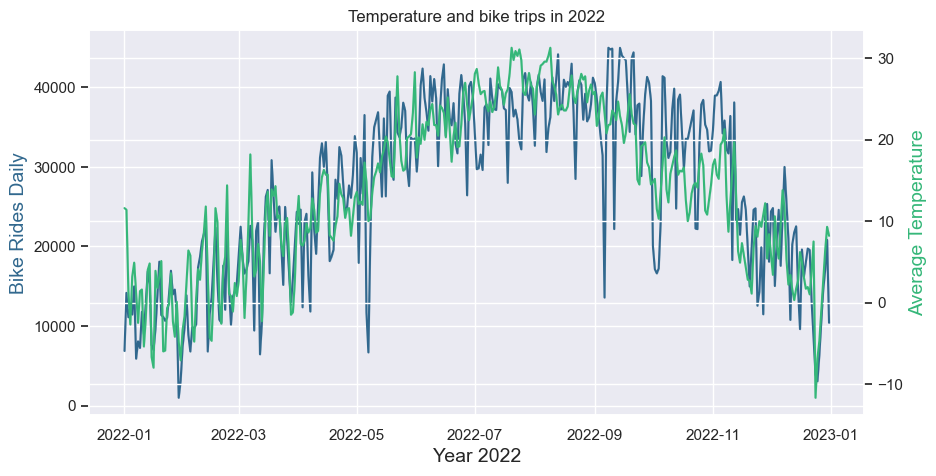

In [33]:
# Create a Dual Axis line plot showing the rides_count and Temperature in 2022 Using seaborn

# Set the global theme
sns.set_theme(style='darkgrid', palette='viridis')

# Extract colors from the 'viridis' palette
palette = sns.color_palette("viridis", n_colors=2)  # Extract 2 colors for the two lines
color1, color2 = palette

fig,ax = plt.subplots(figsize = (10,5))

# Plot the first line on the primary axis
sns.lineplot ( data= df_temp['bike_rides_daily'], color =color1, ax = ax)
ax.set_xlabel('Year 2022', fontsize = 14)
ax.set_ylabel('Bike Rides Daily', color =color1, fontsize = 14)

# Secondary y-axis and plot
ax2=ax.twinx()
sns.lineplot(data=df_temp['avgTemp'], color=color2,ax=ax2)
ax2.set_ylabel('Average Temperature',color=color2,fontsize=14)

#Set a Title
plt.title('Temperature and bike trips in 2022')
plt.show()

# MAKE A BOX PLOT 

In [34]:
df_ds.dtypes

ride_id                       object
rideable_type                 object
started_at                    object
ended_at                      object
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
date                  datetime64[ns]
avgTemp                      float64
_merge                        object
value                          int64
bike_rides_daily               int64
merge_flag                  category
dtype: object

In [36]:
df_ds['rideable_type']

0           classic_bike
1           classic_bike
2          electric_bike
3           classic_bike
4           classic_bike
               ...      
9946051    electric_bike
9946052     classic_bike
9946053    electric_bike
9946054    electric_bike
9946055    electric_bike
Name: rideable_type, Length: 9946056, dtype: object

In [37]:
df_ds['member_casual']

0          member
1          member
2          member
3          member
4          casual
            ...  
9946051    member
9946052    casual
9946053    casual
9946054    casual
9946055    member
Name: member_casual, Length: 9946056, dtype: object

C:\Users\carol\AppData\Local\Temp\ipykernel_33156\2103728318.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'member_casual', y = 'bike_rides_daily',data = df_ds, palette = 'viridis')


AttributeError: module 'matplotlib.pyplot' has no attribute 'x_label'

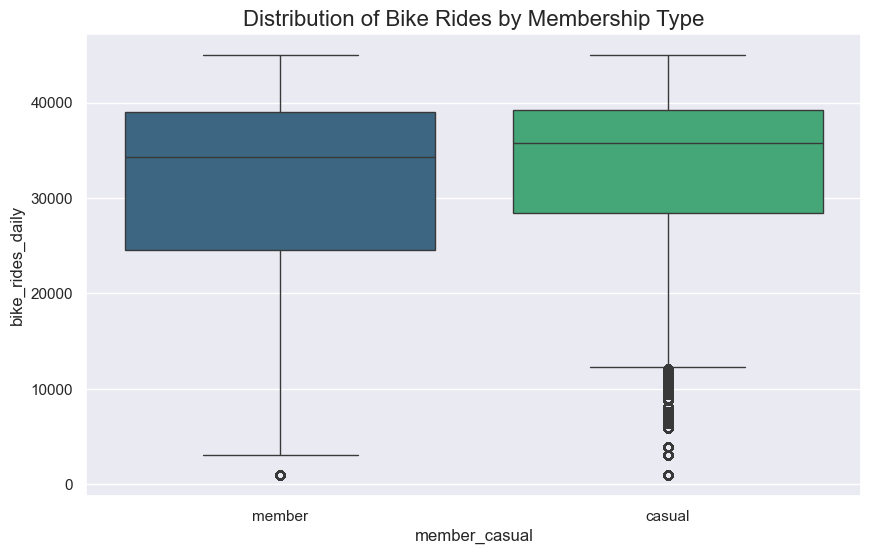

In [39]:
# Creating a box plot with member_casual comparing to the bikes_rides_daily

plt.figure(figsize =(10,6))
sns.boxplot(x = 'member_casual', y = 'bike_rides_daily',data = df_ds, palette = 'viridis')
plt.title('Distribution of Bike Rides by Membership Type', fontsize = 16)
plt.x_label('User Type (Member or Casual)')
plt.y_label('Daily Bike Rides',fontsize = 14)
plt.show()

ANALYSIS OF TEH BOX PLOT:
1. MEDIANS : The median number of daily rides for members is slightly higher than that for casual users, indicating that **members tend to use the service more consistently**.
2. DISTRIBUTION SPREAD: Casual users have a more concentrated distribution, with fewer extreme values
3. OUTLIERS: Members do not exhibit significant outliers, implying more regular usage behavior.

Members contribute a substantial number of rides consistently, while casual users might be influenced by seasonal or one-time usage patterns. 

4. INSIGHTS: **Understanding the behavior of these groups could help design targeted promotions or membership incentives.**

C:\Users\carol\AppData\Local\Temp\ipykernel_33156\168897912.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = 'member_casual', y = 'bike_rides_daily',data = df_ds, palette = 'viridis')


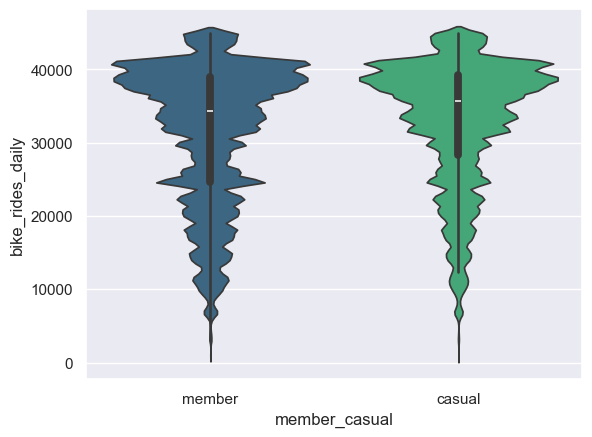

In [40]:
# Using Violinplot

sns.violinplot(x = 'member_casual', y = 'bike_rides_daily',data = df_ds, palette = 'viridis')
plt.show()

ANALYSIS OF TEH VIOLING  PLOT
1. DISTRIBUTION SHAPE: Both distributions exhibit a somewhat symmetric pattern, though casual users show slightly more variability in lower ranges.
2. MEDIANS AND DENSITY: the median, which is higher for members compared to casual users. Members have a more consistent density around their median, while casual users have a more spread-out density.
3. VARIABILITY AND OUTLIERS: Casual users exhibit fatter tails in the lower ranges, which could reflect occasional or irregular bike use.
4. INSIGHTS: Members tend to have a more consistent and frequent usage pattern, likely due to their subscription plans.Casual users, while contributing to significant rides, exhibit a wider variability, which might depend on factors like weather, events, or seasonality.

# FACET GRIDS

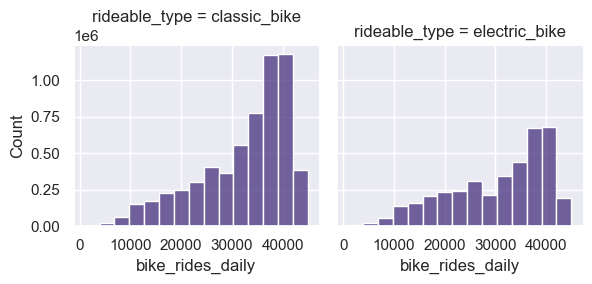

In [43]:
# Creating a facet grid for bike rides and rideable_types
sns.set_theme(style="darkgrid", palette="viridis")

grid = sns.FacetGrid(df_ds, col = 'rideable_type')
grid.map(sns.histplot, 'bike_rides_daily',bins = 15)

plt.show()

Electric bikes show a relatively narrower spread, suggesting that their usage is **more consistent** compared to classic bikes, which exhibit slightly broader variability.

**INSIGHTS**
* Both bike types are heavily used, but classic bikes show more variability, which could reflect their availability or appeal for casual, less predictable riders.
* Electric bikes exhibit more concentrated daily usage, indicating they might cater to more consistent or regular riders, potentially appealing to members or commuters.

# EXTRAS . RECALCULATE TRIP DURATION

In [44]:
df_ds['started_at'] = pd.to_datetime(df_ds['started_at'])
df_ds['ended_at'] = pd.to_datetime(df_ds['ended_at'])

In [46]:
# Calculate trip duration as the difference between 'ended_at' and 'started_at'
df_ds['trip_duration'] = (df_ds['ended_at'] - df_ds['started_at'])

In [47]:
# Display the updated DataFrame
df_ds.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp,_merge,value,bike_rides_daily,merge_flag,trip_duration
0,4A091640AEC83471,classic_bike,2022-01-01 16:01:22.082,2022-01-01 16:05:11.986,S 4 St & Wythe Ave,5204.05,Kent Ave & S 11 St,5062.01,40.712859,-73.965903,40.707645,-73.968415,member,2022-01-01,11.6,both,1,6864,both,0 days 00:03:49.904000
1,FE4CE7F1CFFD7952,classic_bike,2022-01-01 08:04:51.755,2022-01-01 08:08:07.290,Central Park North & Adam Clayton Powell Blvd,7617.07,E 110 St & Madison Ave,7587.14,40.799484,-73.955613,40.796154,-73.947821,member,2022-01-01,11.6,both,1,6864,both,0 days 00:03:15.535000
2,64D8D8FE82EA1AC2,electric_bike,2022-01-01 16:24:24.277,2022-01-01 16:27:43.017,E 2 St & 2 Ave,5593.02,Allen St & Rivington St,5414.06,40.725029,-73.990697,40.720196,-73.989978,member,2022-01-01,11.6,both,1,6864,both,0 days 00:03:18.740000
3,ABA4A9E48D118557,classic_bike,2022-01-01 10:20:23.754,2022-01-01 10:31:15.400,Broadway & E 14 St,5905.12,E 25 St & 1 Ave,6004.07,40.734546,-73.990741,40.738177,-73.977387,member,2022-01-01,11.6,both,1,6864,both,0 days 00:10:51.646000
4,5BB1B08A0BDB1075,classic_bike,2022-01-01 13:44:26.897,2022-01-01 14:00:33.070,Grand St & Elizabeth St,5382.06,Mott St & Prince St,5561.04,40.718822,-73.995960,40.723180,-73.994800,casual,2022-01-01,11.6,both,1,6864,both,0 days 00:16:06.173000


In [48]:
# Convert 'trip_duration' to minutes (if needed) using .dt.total_seconds() / 60
df_ds['trip_duration_minutes'] = df_ds['trip_duration'].dt.total_seconds() / 60

# Drop any NaN values in 'trip_duration_minutes'
trip_duration = df_ds['trip_duration_minutes'].dropna()


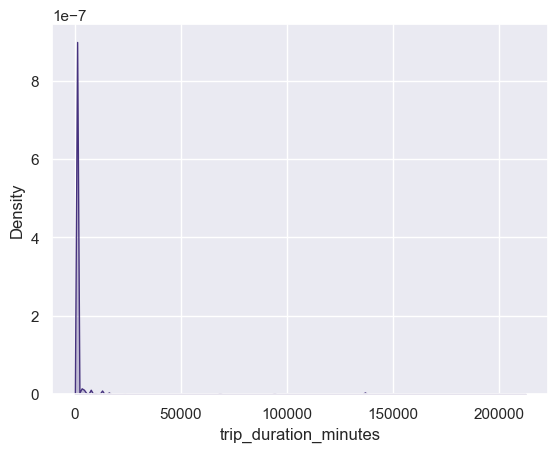

In [57]:
# Setting the theme ( style and palette)

sns.set_theme(style="darkgrid", palette="viridis")

sns.kdeplot(df_ds['trip_duration_minutes'],fill = True) # fill = True  is used to create a filled Kernel Density Estimation (KDE) plot. It fills the area under the KDE curve with a solid color
plt.show()

In [61]:
# Filter trip durations under 18 minutes ( 75% of the bike rides review)
filtered_trip_duration = df_ds[df_ds['trip_duration_minutes'] < 18]

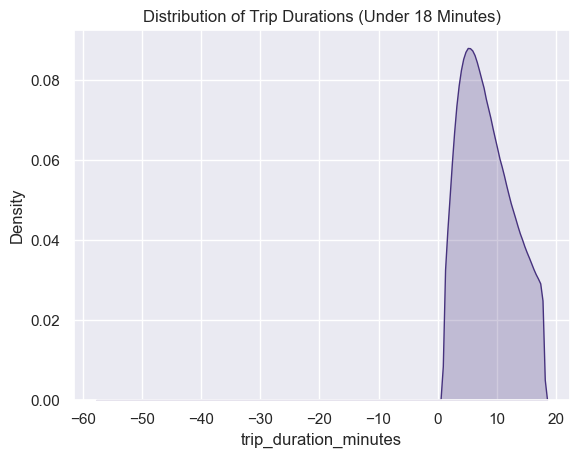

In [62]:
#For the filtered version

sns.kdeplot(filtered_trip_duration['trip_duration_minutes'], fill=True)
plt.title("Distribution of Trip Durations (Under 18 Minutes)")
plt.show()

In [ ]:
#Download data df_ds
df_ds.to_csv('nyc_data_2.4.csv')